In [4]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
dataPath = 'all-data'
stationPath = os.listdir(dataPath)

In [46]:
listOfDataFrames=[]
for station in stationPath:
    filePath=dataPath+'\\'+station
    print("Processing station: "+station)
    airQualityData=pd.read_csv(filePath, sep=';', header=0).rename(columns={'Start':'Start','Slut':'Stop'})
    airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2.5',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('CO.*','CO',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('BC.*','BC',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('Black Carbon.*','Black Carbon',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('O3.*','O3',x), inplace = True)
    
    listOfDataFrames.append(airQualityData)

Processing station: shair-13349-1-6-3.csv
Processing station: shair-155527-1-6-3.csv
Processing station: shair-157992-1-6-3.csv
Processing station: shair-157993-1-6-3.csv
Processing station: shair-159403-1-6-3.csv
Processing station: shair-18644-1-6-3.csv
Processing station: shair-8779-1-6-3.csv
Processing station: shair-8780-1-6-3.csv
Processing station: shair-8781-1-6-1.csv


In [47]:
airDataFrame= pd.DataFrame(columns= []) # This will contain all of the aggregated data
for airData in listOfDataFrames:
    airDataFrame=airDataFrame.append(airData)

In [49]:
airDataFrame

,Start,Stop,NO2,NOX,PM10,PM2.5,CO,BC,Black Carbon,O3
0,2017-01-01 00:00,2017-01-01 01:00,35.0,70.7,57.80,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00,2017-01-01 02:00,28.5,54.8,17.50,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00,2017-01-01 03:00,33.6,72.2,11.80,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00,2017-01-01 04:00,30.1,58.7,11.90,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00,2017-01-01 05:00,30.9,52.4,6.38,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26275,2019-12-31 19:00,2019-12-31 20:00,4.4,4.6,6.40,2.4,NaN,NaN,0.488,73.0
26276,2019-12-31 20:00,2019-12-31 21:00,3.2,3.4,4.50,2.4,NaN,NaN,0.425,73.5
26277,2019-12-31 21:00,2019-12-31 22:00,2.7,2.6,3.00,2.4,NaN,NaN,0.390,73.6
26278,2019-12-31 22:00,2019-12-31 23:00,3.1,3.1,2.80,1.7,NaN,NaN,0.193,71.5


In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [88]:

X = airDataFrame.drop(columns=['Start','Stop','PM10'])  #independent columns
y = airDataFrame.iloc[:,4]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

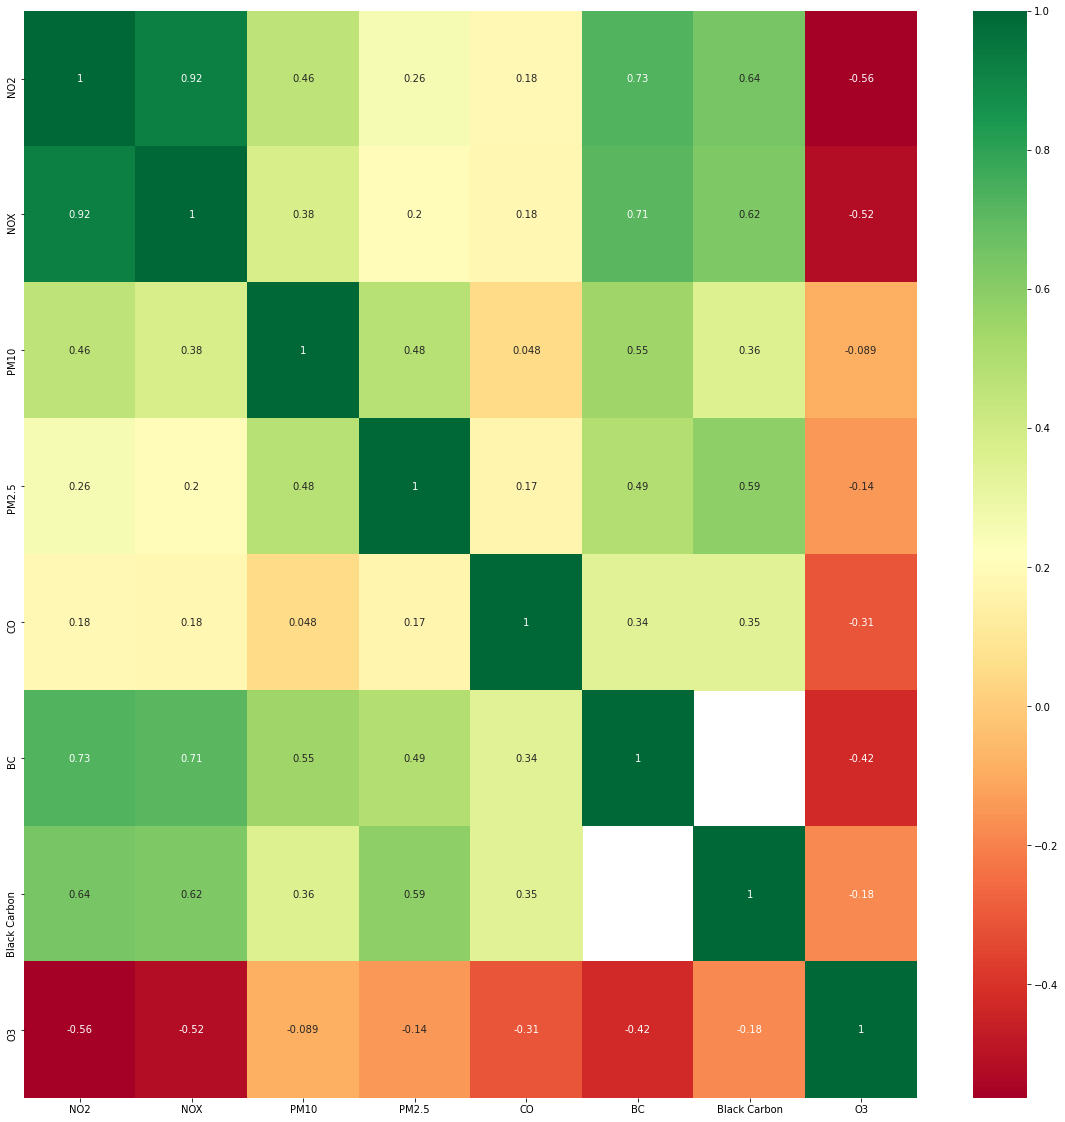

In [95]:

#get correlations of each features in dataset
corrmat = airDataFrame.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(airDataFrame[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [96]:
print(airDataFrame.isnull().sum())

Start                0
Stop                 0
NO2               2620
NOX               2429
PM10              5512
PM2.5            64147
CO              128496
BC              166632
Black Carbon    145410
O3              138742
dtype: int64
